<a href="https://colab.research.google.com/github/divyanshuraj6815/eva/blob/master/Experiment%2012/TensorFlow2_explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uninstall and Install tensorflow version-2 as colab uses tensorflow version-1.15 by default**

**Imp** : Be sure to install gpu version of tensorflow version-2


In [1]:
!pip uninstall tensorflow
!pip install tensorflow-gpu==2.0.0-alpha0

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 332.1MB 49kB/s 
     |████████████████████████████████| 419kB 35.3MB/s 
     |████████████████████████████████| 3.0MB 27.6MB/s 


**Standard Imports which do not need introduction**


In [0]:
import numpy as np
import time, math
import matplotlib.pyplot as plt

**tqdm** : It is a library used to display progress bars in a fancy way.

Read about it : https://towardsdatascience.com/progress-bars-in-python-4b44e8a4c482

In [0]:
from tqdm import tqdm_notebook as tqdm

**tensorflow** : Import tensorflow and also check the version

In [4]:
import tensorflow as tf
print (tf.__version__)

from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.utils import plot_model, to_categorical

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

2.0.0-alpha0


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

**Eager Execution** : In short the simple code we see down there is possible due to eager execution. Traditional tensorflow creates a graph and we need to run sessions to do something.

It promises an alternative to the inflexible graph system, where we can simply start our file with tf.enable_eager_execution(), and then actually print out the values of tensors as we create them, without having to create a session.

**Some blogs explaining the same** : 

1.   https://medium.com/coinmonks/8-things-to-do-differently-in-tensorflows-eager-execution-mode-47cf429aa3ad
2.   https://medium.com/@lsgrep/tensorflow-1-0-vs-2-0-part-2-eager-execution-and-autograph-47473ed8b817

**It is by default enabled for tensorflow2**


In [5]:
tf.executing_eagerly()

True

Make sure tensorflow recognizes the GPU


In [6]:
print (tf.test.gpu_device_name())

/device:GPU:0


These are the experimented values from here : https://mc.ai/tutorial-1-cifar10-with-google-colabs-free-gpu%E2%80%8A-%E2%80%8A92-5/


In [0]:
BATCH_SIZE = 512 #@param {type:"integer"}
MOMENTUM = 0.9 #@param {type:"number"}
LEARNING_RATE = 0.4 #@param {type:"number"}
WEIGHT_DECAY = 5e-4 #@param {type:"number"}
EPOCHS = 24 #@param {type:"integer"}

**init_pytorch** : The author of this code is trying to replicate a code written in pytorch. This piece of code for intitialization for a kernel with the same logic as of pytorch in tensorflow keras.

**PyTorch** basically takes the inverse square root of the layer’s fan-in as a bound, and then generates a random initial weight in the range ```[-bound, bound]```

In [0]:
def init_pytorch(shape, dtype=tf.float32, partition_info=None):
  fan = np.prod(shape[:-1])
  bound = 1 / math.sqrt(fan)
  return tf.random.uniform(shape, minval=-bound, maxval=bound, dtype=dtype)

**ConvBN** : A very standard way for defining a model.
1. declare all the layers and the channels is the input (c_out)
2. Define call function to call all the layer in the defined sequence

So for example **c_out** is 64, then call function would return:
1. convolution with 3x3 kernel to convert the image/layer to 64 channels with same padding and init_pytorch as the kernel initializer.
2. dropout on top of this convolution layer.
3. batch normalization on the dropout layer.
4. relu activation on the batch normalized layer will be returned.

In [0]:
class ConvBN(tf.keras.Model):
  def __init__(self, c_out):
    super().__init__()
    self.conv = tf.keras.layers.Conv2D(filters=c_out, kernel_size=3, padding="SAME", kernel_initializer=init_pytorch, use_bias=False)
    self.bn = tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5)
    self.drop = tf.keras.layers.Dropout(0.05)

  def call(self, inputs):
    return tf.nn.relu(self.bn(self.drop(self.conv(inputs))))

**ResBlk** : Defining a resnet block
1. **c_out** : number of expected channels
2. **pool** : pool layer defined and sent as a parameter to use.
3. **res** : parameter used to decide whether to add the residual to the actual pipeline before retruning or not.

so for example **c_out** = 64, **pool** = MaxPool, **res** = True:
1. res1 = **ConvBN (64)** which is `relu (batch_normalization (dropout (conv2d (64, 3, input))))`
2. res2 = **ConvBN**
3. h = Maxpool (convBN (input)) where size of image will reduce by a factor of 2
4. residual_block = `res2 (res1 (h))` which is equivalent to 2 times **convBN** over **h**
5. add the **residual_block** to **h** and return it.

![](https://cdn-images-1.medium.com/freeze/max/1000/1*4rLMWsFt-48N7e1sNXxu0g.png?q=20)


In [0]:
class ResBlk(tf.keras.Model):
  def __init__(self, c_out, pool, res = False):
    super().__init__()
    self.conv_bn = ConvBN(c_out)
    self.pool = pool
    self.res = res
    if self.res:
      self.res1 = ConvBN(c_out)
      self.res2 = ConvBN(c_out)

  def call(self, inputs):
    h = self.pool(self.conv_bn(inputs))
    if self.res:
      h = h + self.res2(self.res1(h))
    return h

**DavidNet** The model explanation:
1. **c** : is a number of channels
2. **weight** : The final fully-connected classifier layer is following by a scaling operation, which multiplies the logits by 0.125. This scaling factor 0.125 is hand-tuned in DavidNet, and we follow the same hyperparameter.

**Residual blocks**
1. blk1 = **ResBlk (128, MaxPool, add residue)**
2. blk2 = **ResBlk (256, MaxPool)**
3. blk3 = **ResBlk (512, MaxPool, add residue)**
4. linear = dense layer with 10 classes

**Explained  with diagram**:

------------>convBN----------------------------->ResBlk1--------------------------------->ResBlk2------------------------------->ResBlk3--------------------------------->last layers    
![](https://cdn-images-1.medium.com/freeze/max/1000/1*uKqdR2jn83pOhTEMLHQpJQ.png?q=20)

This return loss and accuracy

In [0]:
class DavidNet(tf.keras.Model):
  def __init__(self, c=64, weight=0.125):
    super().__init__()
    pool = tf.keras.layers.MaxPooling2D()
    self.init_conv_bn = ConvBN(c)
    self.blk1 = ResBlk(c*2, pool, res = True)
    self.blk2 = ResBlk(c*4, pool)
    self.blk3 = ResBlk(c*8, pool, res = True)
    self.pool = tf.keras.layers.GlobalMaxPool2D()
    self.linear = tf.keras.layers.Dense(10, kernel_initializer=init_pytorch, use_bias=False)
    self.weight = weight

  def call(self, x, y):
    h = self.pool(self.blk3(self.blk2(self.blk1(self.init_conv_bn(x)))))
    h = self.linear(h) * self.weight
    ce = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=h, labels=y)
    loss = tf.reduce_sum(ce)
    correct = tf.reduce_sum(tf.cast(tf.math.equal(tf.argmax(h, axis = 1), y), tf.float32))
    return loss, correct

**ResNet50** : We also load a pretrained model and define it in the same way, keeping other parameters same.

In [0]:
class ResNet50 (tf.keras.Model):
  def __init__ (self):
    super().__init__()
    self.res_net = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)
    self.global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    self.linear = tf.keras.layers.Dense(10, kernel_initializer=init_pytorch, use_bias=False)

  def call (self, x, y):
    h = self.linear (self.global_average_layer (self.res_net (x)))
    ce = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=h, labels=y)
    loss = tf.reduce_sum(ce)
    correct = tf.reduce_sum(tf.cast(tf.math.equal(tf.argmax(h, axis = 1), y), tf.float32))
    return loss, correct

**CIFAR10** Download and normalize cifar10 data

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
len_train, len_test = len(x_train), len(x_test)
y_train = y_train.astype('int64').reshape(len_train)
y_test = y_test.astype('int64').reshape(len_test)

index = 100
MODE = 'constant'
original = x_train[index]

train_mean = np.mean(x_train, axis=(0,1,2))
train_std = np.std(x_train, axis=(0,1,2))

normalize = lambda x: ((x - train_mean) / train_std).astype('float32') # todo: check here
pad4 = lambda x: np.pad(x, [(0, 0), (4, 4), (4, 4), (0, 0)], mode=MODE)

x_train = normalize(pad4(x_train))
x_test = normalize(x_test)

170500096/170498071 [==============================] - 2s 0us/step


**cutout** :
1. cutout_num = size of the square cutout needed
2. create a mask of numpy array of same size as image.
3. take cutout
4. multiply original image with the mask

**Why create a mask and multiply?**

Item Assignment is not possible for eager tensor.

In [0]:
def cutout (image, cutout_num):
  rand_x = np.random.randint (0, 32 + cutout_num)
  rand_y = np.random.randint (0, 32 + cutout_num)
  new_image = np.ones ([32 + cutout_num, 32 + cutout_num, 3])
  new_image[rand_x : rand_x + cutout_num, rand_y : rand_y + cutout_num, :] = 0
  new_image = new_image[cutout_num : cutout_num + 32, cutout_num : cutout_num + 32, :]
  new_image = tf.convert_to_tensor (new_image, dtype='float32')
  image = image * new_image
  return image

**data_aug**:
1. pad with 4 and take random crop of 32
2. randomly flip left or right
3. random cutout

In [0]:
cutout_num = 8
data_aug = lambda x, y: (cutout (tf.image.random_flip_left_right(tf.image.random_crop(x, [32, 32, 3])), cutout_num), y)

Original


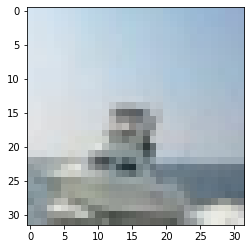

Final


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


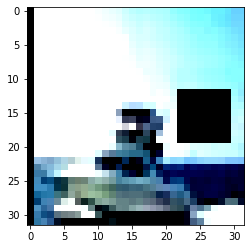

50000


In [16]:
print ('Original')
plt.imshow (original)
plt.show ()
print ('Final')
plt.imshow (data_aug (x_train[ index ], y_train[ index ])[0])
plt.show ()
print (len (x_train))

**Initialize both the models**

In [17]:
d_model = DavidNet()
r_model = ResNet50()
batches_per_epoch = len_train//BATCH_SIZE + 1

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


**lr_schedule** : We create a peicewise function with `np.interpol`

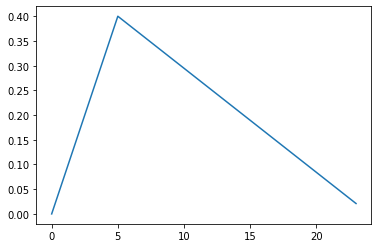

In [18]:
lr_schedule = lambda t: np.interp([t], [0, (EPOCHS+1)//5, EPOCHS], [0, LEARNING_RATE, 0])[0]

##see how interp works
x = []
y = []
for i in range (EPOCHS):
  x.append (i)
  y.append (lr_schedule (i))
plt.plot (x, y)

**TensorFlow2** dependencies
1. Replace `tf.train` with `tf.compat.v1.train`
2. Replace `tf.random_crop` with `tf.image.random_crop`

In [0]:
global_step = tf.compat.v1.train.get_or_create_global_step()
lr_func = lambda: lr_schedule(global_step/batches_per_epoch)/BATCH_SIZE
opt = tf.compat.v1.train.MomentumOptimizer(lr_func, momentum=MOMENTUM, use_nesterov=True)

**Understanding the code :**

`test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)`

`train_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))`

`train_set = train_set.map(data_aug).shuffle(len_train).batch(BATCH_SIZE).prefetch(2)`

**from_tensor_slices** takes the numpy.ndarray and divides it into single element of tensors

Tutorial : https://www.geeksforgeeks.org/tensorflow-tf-data-dataset-from_tensor_slices/

**batch** converts a list to a list of batch.

**prefetch** : fetches the data for next iteration : https://www.tensorflow.org/guide/data_performance#prefetching

See the example illustrated below:

In [20]:
print (type (x_train))

#single slices
print ('single slices')
for element in tf.data.Dataset.from_tensor_slices (x_train):
  print (type(element))
  print (element.shape)
  break

#slices of batch
print ('\nslices of batch')
for element in tf.data.Dataset.from_tensor_slices (x_train).batch (BATCH_SIZE):
  print (type(element))
  print (element.shape)
  break

#with data augmentation
print ('\nwith data augmentation')
for element in tf.data.Dataset.from_tensor_slices ((x_train, y_train)).map (data_aug):
  print (type(element))
  print (element[0].shape)
  break

#with data augmentation and batching
print ('\nwith data augmentation and batching')
for element in tf.data.Dataset.from_tensor_slices ((x_train, y_train)).map (data_aug).shuffle (len_train).batch (BATCH_SIZE):
  print (type(element))
  print (element[0].shape)
  break

<class 'numpy.ndarray'>
single slices
<class 'tensorflow.python.framework.ops.EagerTensor'>
(40, 40, 3)

slices of batch
<class 'tensorflow.python.framework.ops.EagerTensor'>
(512, 40, 40, 3)

with data augmentation
<class 'tuple'>
(32, 32, 3)

with data augmentation and batching
<class 'tuple'>
(512, 32, 32, 3)


**Gradient :** Tries to find minima

Example from https://www.tensorflow.org/api_docs/python/tf/GradientTape:
```
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as g:
  g.watch(x)
  y = x * x
  z = y * y
dz_dx = g.gradient(z, x)  # 108.0 (4*x^3 at x = 3)
dy_dx = g.gradient(y, x)  # 6.0
del g  # Drop the reference to the tape
```
Trying to understand on similar lines:
```
with tf.GradientTape() as tape:
```
defining the function as y = x * x. **loss** and **correct** are float tensors
```
  loss, correct = model(x, y)
```
getting the trainable variables from modes. This is a list of tensors. 
**var[0]** will be a tensor of (3, 3, 3, 64) whereas **var[16]** will be a tensor of (512, ). It depends on the layers as defined in the model.
```
  var = model.trainable_variables
```
getting the minima. **grads** will also be a list same as **var**.
```
  grads = tape.gradient(loss, var)
```
Some computation to back propogate weight decay with batch_size
```
  for g, v in zip(grads, var):
    g += v * WEIGHT_DECAY * BATCH_SIZE
```
Apply these to the optimizer funtion **MomentumOptimizer**
```
  opt.apply_gradients(zip(grads, var), global_step=global_step)
```





**Train DavidNet for 24 epochs**

In [21]:
t = time.time()
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)
flag = 1

for epoch in range(EPOCHS):
  train_loss = test_loss = train_acc = test_acc = 0.0
  train_set = tf.data.Dataset.from_tensor_slices((x_train, y_train)).map(data_aug).shuffle(len_train).batch(BATCH_SIZE).prefetch(2)
  
  tf.keras.backend.set_learning_phase(1)
  for (x, y) in tqdm(train_set):
    with tf.GradientTape() as tape:
      loss, correct = d_model(x, y)

    if flag == 1:
      print ('loss', type (loss), loss)
      print ('correct', type (correct), correct)

    var = d_model.trainable_variables

    if flag == 1:
      print ('var', type (var), len (var))
      print ('var[16]', type (var[0]), var[16].shape)
    
    grads = tape.gradient(loss, var)
    
    if flag == 1:
      print ('grads', type (grads), len (grads))
      print ('grads[10]', type (grads[0]), grads[10].shape)
        
    for g, v in zip (grads, var):
      g += v * WEIGHT_DECAY * BATCH_SIZE
      if flag == 1:
        print ('g', type (g), g.shape)
        print ('v', type (v), v.shape)
      flag = 0

    opt.apply_gradients(zip(grads, var), global_step=global_step)

    #Addition over epoch to find average
    train_loss += loss.numpy()
    train_acc += correct.numpy()
    
  tf.keras.backend.set_learning_phase(0)
  for (x, y) in test_set:
    loss, correct = d_model(x, y)
    test_loss += loss.numpy()
    test_acc += correct.numpy()
  
  print('epoch:', epoch+1, 'lr:', lr_schedule(epoch+1), 'train loss:', train_loss / len_train, 'train acc:', train_acc / len_train, 'val loss:', test_loss / len_test, 'val acc:', test_acc / len_test, 'time:', time.time() - t)

loss <class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(1192.1128, shape=(), dtype=float32)
correct <class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(44.0, shape=(), dtype=float32)
var <class 'list'> 25
var[0] <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> (512,)
grads <class 'list'> 25
grads[0] <class 'tensorflow.python.framework.ops.EagerTensor'> (128,)
g <class 'tensorflow.python.framework.ops.EagerTensor'> (3, 3, 3, 64)
v <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> (3, 3, 3, 64)

epoch: 1 lr: 0.08 train loss: 1.7187542694091797 train acc: 0.36936 val loss: 1.3345268127441405 val acc: 0.5037 time: 99.47102236747742



epoch: 2 lr: 0.16 train loss: 1.0006253887939454 train acc: 0.6417 val loss: 0.8728407897949219 val acc: 0.7082 time: 187.70030617713928



epoch: 3 lr: 0.24 train loss: 0.72046220703125 train acc: 0.74616 val loss: 0.7704782608032227 val acc: 0.7422 time: 276.18885684013367



epoch: 4 lr: 0.32 train loss: 0.6136815930175781 train acc: 0.79116 val loss: 0.7586381759643555 val acc: 0.7616 time: 364.8973124027252



epoch: 5 lr: 0.4 train loss: 0.5292235012817382 train acc: 0.81934 val loss: 0.7884576889038086 val acc: 0.7558 time: 453.55345606803894



epoch: 6 lr: 0.37894736842105264 train loss: 0.4292431069946289 train acc: 0.85048 val loss: 0.49391236267089844 val acc: 0.8321 time: 542.2773253917694



epoch: 7 lr: 0.35789473684210527 train loss: 0.421240411529541 train acc: 0.85428 val loss: 0.6958102355957031 val acc: 0.782 time: 631.0484864711761



epoch: 8 lr: 0.33684210526315794 train loss: 0.4355913854980469 train acc: 0.84934 val loss: 0.5204358032226563 val acc: 0.8326 time: 719.6442360877991



epoch: 9 lr: 0.31578947368421056 train loss: 0.28450183715820315 train acc: 0.9023 val loss: 0.38534912185668946 val acc: 0.8747 time: 807.8010268211365



epoch: 10 lr: 0.2947368421052632 train loss: 0.35766592529296876 train acc: 0.87336 val loss: 0.49973821487426756 val acc: 0.8473 time: 896.2979950904846



epoch: 11 lr: 0.2736842105263158 train loss: 0.24645937896728515 train acc: 0.91434 val loss: 0.35069095458984373 val acc: 0.8801 time: 984.5386755466461



epoch: 12 lr: 0.25263157894736843 train loss: 0.20852476501464845 train acc: 0.92808 val loss: 0.3644463394165039 val acc: 0.8814 time: 1072.8222889900208



epoch: 13 lr: 0.23157894736842108 train loss: 0.1769112989807129 train acc: 0.93922 val loss: 0.3483466766357422 val acc: 0.8886 time: 1160.5243339538574



epoch: 14 lr: 0.2105263157894737 train loss: 0.15622390068054198 train acc: 0.9459 val loss: 0.33103670082092285 val acc: 0.8943 time: 1248.468349456787



epoch: 15 lr: 0.18947368421052635 train loss: 0.25116107818603517 train acc: 0.91232 val loss: 0.350111971282959 val acc: 0.8886 time: 1336.7958192825317



epoch: 16 lr: 0.16842105263157897 train loss: 0.20474028060913085 train acc: 0.92648 val loss: 0.29324091491699217 val acc: 0.9092 time: 1424.7172577381134



epoch: 17 lr: 0.1473684210526316 train loss: 0.12809891815185548 train acc: 0.95628 val loss: 0.2938649887084961 val acc: 0.9074 time: 1512.9961953163147



epoch: 18 lr: 0.12631578947368421 train loss: 0.103424384765625 train acc: 0.9648 val loss: 0.2863242305755615 val acc: 0.9122 time: 1601.2183697223663



epoch: 19 lr: 0.10526315789473689 train loss: 0.09765986911773682 train acc: 0.96656 val loss: 0.26580516815185545 val acc: 0.9186 time: 1689.036161661148



epoch: 20 lr: 0.08421052631578951 train loss: 0.0771839673614502 train acc: 0.97494 val loss: 0.24785482559204103 val acc: 0.9241 time: 1777.3077569007874



epoch: 21 lr: 0.06315789473684214 train loss: 0.16560460739135743 train acc: 0.942 val loss: 0.2722362190246582 val acc: 0.916 time: 1865.287831068039



epoch: 22 lr: 0.04210526315789476 train loss: 0.06761207859039306 train acc: 0.97894 val loss: 0.2443558525085449 val acc: 0.9243 time: 1953.3107295036316



epoch: 23 lr: 0.02105263157894738 train loss: 0.13728543182373046 train acc: 0.9515 val loss: 0.2526520576477051 val acc: 0.9234 time: 2041.279308795929



epoch: 24 lr: 0.0 train loss: 0.10459023258209228 train acc: 0.96404 val loss: 0.24197344284057618 val acc: 0.9264 time: 2130.062705516815


**Train ResNet50 for 24 epochs**

In [0]:
t = time.time()
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)
flag = 1

for epoch in range(EPOCHS):
  train_loss = test_loss = train_acc = test_acc = 0.0
  train_set = tf.data.Dataset.from_tensor_slices((x_train, y_train)).map(data_aug).shuffle(len_train).batch(BATCH_SIZE).prefetch(2)
  
  tf.keras.backend.set_learning_phase(1)
  for (x, y) in tqdm(train_set):
    with tf.GradientTape() as tape:
      loss, correct = r_model(x, y)

    if flag == 1:
      print ('loss', type (loss), loss)
      print ('correct', type (correct), correct)

    var = r_model.trainable_variables

    if flag == 1:
      print ('var', type (var), len (var))
      print ('var[16]', type (var[0]), var[16].shape)
    
    grads = tape.gradient(loss, var)
    
    if flag == 1:
      print ('grads', type (grads), len (grads))
      print ('grads[10]', type (grads[0]), grads[10].shape)
        
    for g, v in zip (grads, var):
      g += v * WEIGHT_DECAY * BATCH_SIZE
      if flag == 1:
        print ('g', type (g), g.shape)
        print ('v', type (v), v.shape)
      flag = 0

    opt.apply_gradients(zip(grads, var), global_step=global_step)

    #Addition over epoch to find average
    train_loss += loss.numpy()
    train_acc += correct.numpy()
    
  tf.keras.backend.set_learning_phase(0)
  for (x, y) in test_set:
    loss, correct = r_model(x, y)
    test_loss += loss.numpy()
    test_acc += correct.numpy()
  
  print('epoch:', epoch+1, 'lr:', lr_schedule(epoch+1), 'train loss:', train_loss / len_train, 'train acc:', train_acc / len_train, 'val loss:', test_loss / len_test, 'val acc:', test_acc / len_test, 'time:', time.time() - t)

loss <class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(1332.7518, shape=(), dtype=float32)
correct <class 'tensorflow.python.framework.ops.EagerTensor'> tf.Tensor(55.0, shape=(), dtype=float32)
var <class 'list'> 213
var[16] <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> (256,)
grads <class 'list'> 213
grads[10] <class 'tensorflow.python.framework.ops.EagerTensor'> (64,)
g <class 'tensorflow.python.framework.ops.EagerTensor'> (7, 7, 3, 64)
v <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> (7, 7, 3, 64)

epoch: 1 lr: 0.08 train loss: 2.5878122595214843 train acc: 0.09962 val loss: 3.050021710205078 val acc: 0.0963 time: 91.1008095741272



epoch: 2 lr: 0.16 train loss: 2.589837664794922 train acc: 0.09998 val loss: 4.702005395507813 val acc: 0.1069 time: 176.09359788894653



epoch: 3 lr: 0.24 train loss: 2.5942324658203124 train acc: 0.0948 val loss: 7.208629736328125 val acc: 0.0993 time: 259.33692240715027



epoch: 4 lr: 0.32 train loss: 2.5893197973632813 train acc: 0.09656 val loss: 6.235202099609375 val acc: 0.1078 time: 342.46765875816345



epoch: 5 lr: 0.4 train loss: 2.586360202636719 train acc: 0.0979 val loss: 4.3377354614257815 val acc: 0.1119 time: 426.69782042503357



epoch: 6 lr: 0.37894736842105264 train loss: 2.5941654443359377 train acc: 0.09698 val loss: 3.9312909057617187 val acc: 0.1089 time: 509.68283867836



epoch: 7 lr: 0.35789473684210527 train loss: 2.584387735595703 train acc: 0.10232 val loss: 2.8274808715820314 val acc: 0.1007 time: 592.7095291614532



epoch: 8 lr: 0.33684210526315794 train loss: 2.583559984130859 train acc: 0.09924 val loss: 2.6412390197753908 val acc: 0.1006 time: 677.19393491745



epoch: 9 lr: 0.31578947368421056 train loss: 2.579285677490234 train acc: 0.09992 val loss: 2.6471071044921874 val acc: 0.0992 time: 761.0763688087463



epoch: 10 lr: 0.2947368421052632 train loss: 2.5835750695800783 train acc: 0.10074 val loss: 2.777767236328125 val acc: 0.1024 time: 843.8619811534882



epoch: 11 lr: 0.2736842105263158 train loss: 2.585507746582031 train acc: 0.0983 val loss: 2.6644038757324218 val acc: 0.1019 time: 926.976350069046



epoch: 12 lr: 0.25263157894736843 train loss: 2.586006925048828 train acc: 0.10016 val loss: 2.628948309326172 val acc: 0.102 time: 1010.5760514736176



epoch: 13 lr: 0.23157894736842108 train loss: 2.590687077636719 train acc: 0.09992 val loss: 2.6350622314453127 val acc: 0.1016 time: 1094.58926320076



epoch: 14 lr: 0.2105263157894737 train loss: 2.579835675048828 train acc: 0.09996 val loss: 2.72601494140625 val acc: 0.1048 time: 1177.2520415782928



epoch: 15 lr: 0.18947368421052635 train loss: 2.590136663818359 train acc: 0.09774 val loss: 2.6579907653808594 val acc: 0.1023 time: 1260.185638666153
